In [9]:
from io import StringIO
from scipy import stats
from scipy.interpolate import interp1d
from scipy.signal import hilbert, chirp

import seaborn as sns
import pyaudio
import wave
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [62]:
sample_format = pyaudio.paInt16  # 16 bits per sample
CHANNELS = 1
RATE = 44100
COUNT = 4
CHUNK = int(RATE / COUNT) # 1024 int(RATE / 4)
TRESHHOLD = 2000
seconds = 2
filename = "output.wav"

In [90]:
def get_medians_from_frame(frame):
    medians = []
    for f in frame:
        medians.append(np.median(frame))
    return medians

In [91]:
def get_squares(frame):
    new_frames = []
    for f in frame:
        new_frames.append(
            f ** 2
            # abs(f)
        )
    return new_frames

In [92]:
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

In [93]:
def plot(frame):
    fig = px.line(np.array(frame))
    fig.show()

In [94]:
# data = np.concatenate(frames)
def process(frames):
    print(f"frame = {frames}")
    data = np.concatenate(frames)
    data = get_squares(data)
    data = moving_avg(data, int(CHUNK / 2))
    print(f"moving_avg = {data}")
    plot(data)
    return data

=====

In [109]:
p = pyaudio.PyAudio()

stream = p.open(format=pyaudio.paInt16, channels=CHANNELS, rate=RATE, input=True,  frames_per_buffer=CHUNK)
frames = []
global_frames = []

print("Listening...")
for i in range(0, int(RATE / CHUNK * seconds)):
    sample = stream.read(CHUNK)
    frame = np.fromstring(sample, dtype=np.int16)
    frames.append(frame)
    if len(frames) % COUNT == 0:
        # print("Cough?")
        processed_data = process(frames)

        global_frames.append(processed_data)
        frames = []
    print(f"global_frames = #{global_frames}")
    
stream.stop_stream()
stream.close()
p.terminate()

# save
wf = wave.open(filename, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

ALSA lib pcm_dsnoop.c:567:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1000:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2721:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2721:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2721:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
ALSA lib pcm

Listening...


/tmp/ipykernel_41695/1945538496.py:10: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



global_frames = #[]
global_frames = #[]
global_frames = #[]
frame = [array([0, 0, 0, ..., 0, 0, 0], dtype=int16), array([0, 0, 0, ..., 0, 0, 0], dtype=int16), array([0, 0, 0, ..., 0, 0, 0], dtype=int16), array([0, 0, 0, ..., 7, 4, 2], dtype=int16)]
moving_avg = [    0.             0.             0.         ... 30146.53701016
 30139.06367925 30115.29009434]


global_frames = #[array([    0.        ,     0.        ,     0.        , ...,
       30146.53701016, 30139.06367925, 30115.29009434])]


/tmp/ipykernel_41695/1945538496.py:10: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



global_frames = #[array([    0.        ,     0.        ,     0.        , ...,
       30146.53701016, 30139.06367925, 30115.29009434])]
global_frames = #[array([    0.        ,     0.        ,     0.        , ...,
       30146.53701016, 30139.06367925, 30115.29009434])]
global_frames = #[array([    0.        ,     0.        ,     0.        , ...,
       30146.53701016, 30139.06367925, 30115.29009434])]
frame = [array([ 0, -1, -1, ..., -1, -1,  0], dtype=int16), array([ 0,  0,  0, ...,  0,  2, -3], dtype=int16), array([-15, -31, -42, ...,  -1,  -1,  -1], dtype=int16), array([-1, -1, -1, ..., 26,  9,  0], dtype=int16)]
moving_avg = [1.96480406e+00 1.97641509e+00 1.98276488e+00 ... 1.36942237e+05
 1.36595247e+05 1.36264605e+05]


global_frames = #[array([    0.        ,     0.        ,     0.        , ...,
       30146.53701016, 30139.06367925, 30115.29009434]), array([1.96480406e+00, 1.97641509e+00, 1.98276488e+00, ...,
       1.36942237e+05, 1.36595247e+05, 1.36264605e+05])]


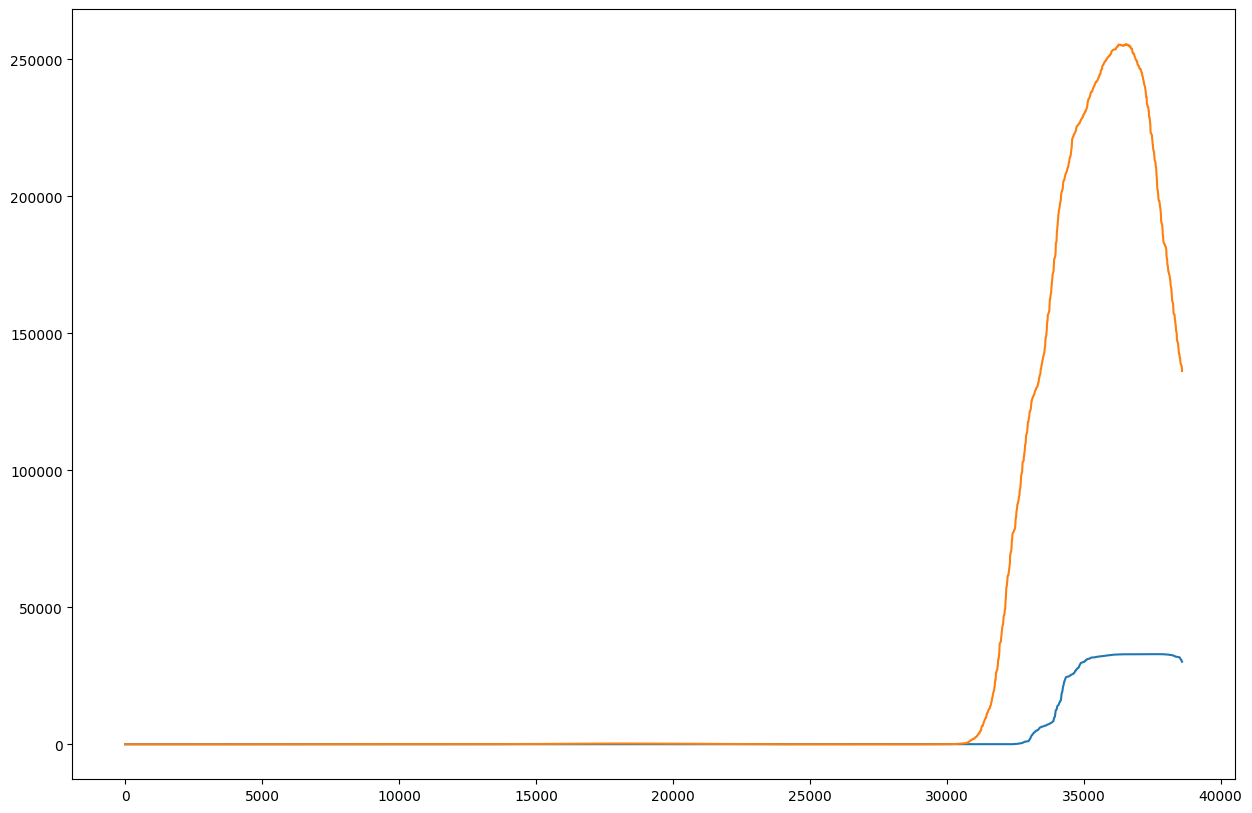

In [110]:
fig, ax = plt.subplots(figsize=(15, 10))
for frame in global_frames:
    plt.plot(frame)